In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import osmnx as ox
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point

# Data Pre-processing 

In [17]:
df = pd.read_excel("ev_final.xlsx")
df

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,15.00 kW,₹12.93 per unit,DC,1.0,DC-001,['4W']
2701,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CCS (DC),['4W']
2702,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CHAdeMO (DC),['4W']
2703,BSES-1,BSES-DEL,Verdemobility,Opposite Crime Police Office Sector-9 Rama Kri...,28.572632,77.169680,New Delhi,India,00:00:00,23:59:59,...,110022,south-west-delhi,NaN,2.0,7.4 kW,₹16 per unit,AC,2.0,TYPE - 2 (AC),['4W']


In [18]:
df.drop_duplicates(subset=["address"], inplace=True)
df.replace("Not Available", pd.np.nan, inplace=True)
print(df.shape)
scaler = StandardScaler()
df[["latitude", "longitude"]] = scaler.fit_transform(df[["latitude", "longitude"]])
df = pd.get_dummies(df, columns=["vendor_name", "city", "country", "station_type"])
print(df.shape)

(1721, 25)
(1721, 71)


In [19]:
location = 'Delhi, India'
# Get the road network for the specified area
G = ox.graph_from_place(location, network_type='drive')
# Project the graph to UTM (Universal Transverse Mercator) for accurate distance calculations
G = ox.project_graph(G)

nodes, edges = ox.graph_to_gdfs(G)

In [20]:
# Convert the charging stations DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
crs = edges.crs  # Get the CRS (Coordinate Reference System) from the edges GeoDataFrame
charging_stations = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [21]:
charging_stations

,uid,name,address,latitude,longitude,open,close,logo_url,staff,payment_modes,...,city_Palakkad,city_Panaji,city_Raipur,city_Thiruvananthapuram,city_Thrissur,country_India,country_India,station_type_battery_swapping,station_type_charging,geometry
0,STATIC12,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",0.170032,0.037066,00:00:00,23:59:59,NaN,Unstaffed,"Card, E-Wallet, UPI",...,0,0,0,0,0,1,0,0,1,POINT (0.037 0.170)
1,STATIC14,REIL,Scada office kalka ji,0.160978,0.046627,00:00:00,23:59:59,NaN,Unstaffed,E-Wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.047 0.161)
2,STATIC15,REIL,Ashram Chowk Mathura Road,0.171050,0.046445,00:00:00,23:59:59,NaN,Unstaffed,E-Wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.046 0.171)
3,STATIC16,REIL,Nizamuddin Railway station,0.177191,0.044911,00:00:00,23:59:59,NaN,Unstaffed,Cash/E-Wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.045 0.177)
4,STATIC17,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",0.163542,0.045237,00:00:00,23:59:59,NaN,Unstaffed,Cash/E-Wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.045 0.164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,969,EESL INSTITUTE OF EN,"C/O NAGPUR MAHAMETRO, INSTITUTE OF ENGI N EER...",-2.393169,0.468921,00:00,23:59,NaN,UnStaffed,E-wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.469 -2.393)
2694,ElectriVa04,SARAI KALE KHAN TOWARDS RAJGHAT- AC001 10 KW,"SARAI KALE KHAN TOWARDS RAJGHAT, New Delhi, De...",0.178501,0.045720,00:00:00,23:59:59,https://electriva.in/wp-content/uploads/2022/0...,Unstaffed,"E-wallet, UPI",...,0,0,0,0,0,1,0,0,1,POINT (0.046 0.179)
2695,695,EESL Mantraly Naya R,"Public Parking, Mahnadi Bhawan, Mantraly Sec -...",-2.385162,1.106543,00:00,23:59,NaN,UnStaffed,E-wallet,...,0,0,1,0,0,1,0,0,1,POINT (1.107 -2.385)
2699,1028,EESL Nehru Park Met,"Near Solar plant bus stop, Sastri Nagar, Che...",-5.173664,0.744993,00:00,23:59,NaN,UnStaffed,E-wallet,...,0,0,0,0,0,1,0,0,1,POINT (0.745 -5.174)


In [11]:
# # Find the nearest graph nodes for each charging station
# charging_station_nodes = ox.distance.nearest_nodes(G, X=charging_stations['longitude'], Y=charging_stations['latitude'])

In [12]:
# charging_station_nodes

[4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,

In [13]:
# # Find the nearest graph nodes for each charging station
# charging_station_nodes = []
# for index, row in charging_stations.iterrows():
#     # Get the latitude and longitude of the charging station
#     lat, lon = row['latitude'], row['longitude']
    
#     # Find the nearest node for the charging station
#     nearest_node = ox.distance.nearest_nodes(G, X=[lon], Y=[lat], return_dist=False)[0]
    
#     # Append the nearest node to the list
#     charging_station_nodes.append(nearest_node)

In [13]:
# # Find the nearest graph nodes for each charging station
# charging_station_nodes = ox.distance.nearest_nodes(G, X=charging_stations['longitude'].tolist(), Y=charging_stations['latitude'].tolist(), return_dist=False)


In [22]:
# # Find the nearest graph nodes for each charging station
charging_station_nodes = []
for geometry in charging_stations['geometry']:
    # Get the nearest node to the charging station
    nearest_node = ox.nearest_nodes(G, geometry.x, geometry.y)
    
    # Append the nearest node to the list
    charging_station_nodes.append(nearest_node)


In [14]:
charging_station_nodes

[4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,
 4171935000,

In [14]:
# Add charging stations as nodes in the graph
for i, (idx, station) in enumerate(charging_stations.iterrows()):
    node_id = charging_station_nodes[i]
    G.nodes[node_id]['charging_station'] = True
    G.nodes[node_id]['name'] = station['name']
    G.nodes[node_id]['latitude'] = station['latitude']
    G.nodes[node_id]['longitude'] = station['longitude']

In [16]:
# Save the graph for future use (optional)
ox.save_graphml(G, 'delhi_ev_graph.graphml')

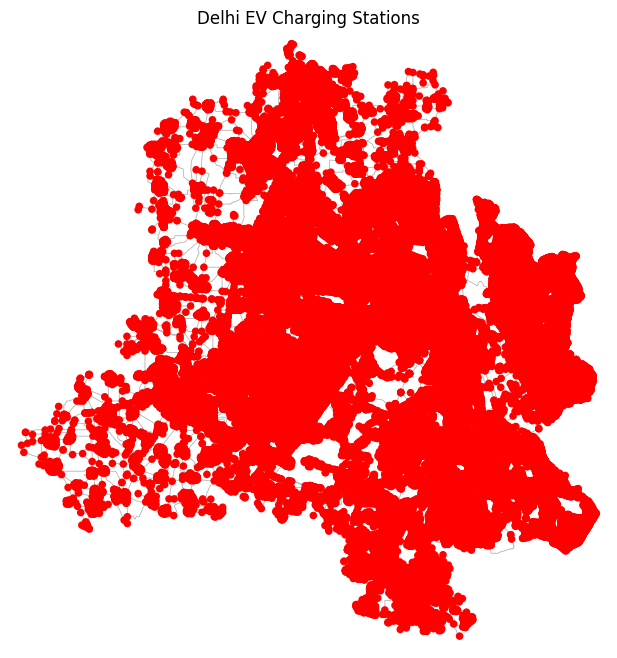

In [17]:
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(G, node_color='r', node_size=30, bgcolor='w', edge_linewidth=0.5, edge_alpha=0.5, show=False, close=False)

# Add charging station locations to the map
charging_stations.plot(ax=ax, markersize=50, marker='o', color='blue', zorder=3)

# Set title and display the map
ax.set_title("Delhi EV Charging Stations")
plt.show()


In [18]:
# Define a function to compute the shortest path considering EV's battery constraints and charging time
def shortest_path_with_constraints(G, origin, destination, battery_range, charging_time, weight='length'):
    # Find the shortest path between origin and destination
    path = nx.shortest_path(G, origin, destination, weight=weight)

    # Calculate the path length
    path_length = nx.path_weight(G, path, weight=weight)

    # Check if the path length exceeds the battery range
    if path_length > battery_range:
        # Find charging stations on the path
        charging_stations_on_path = [node for node in path if G.nodes[node].get('charging_station', False)]

        # Check if there are charging stations on the path
        if charging_stations_on_path:
            # Find the nearest charging station to the origin
            nearest_charging_station = charging_stations_on_path[0]
            nearest_charging_station_distance = nx.shortest_path_length(G, origin, nearest_charging_station, weight=weight)

            # Compute the remaining battery range after reaching the nearest charging station
            remaining_battery_range = battery_range - nearest_charging_station_distance

            # Recursively compute the shortest path from the nearest charging station to the destination
            sub_path = shortest_path_with_constraints(G, nearest_charging_station, destination, remaining_battery_range + charging_time * 100, charging_time, weight)

            # Combine the sub-path with the current path
            path = path[:path.index(nearest_charging_station) + 1] + sub_path[1:]

    return path


In [19]:
origin_point = (0.170032, 0.037066)
destination_point = (0.178501, 0.045720)

origin_node = ox.distance.nearest_nodes(G, X=[origin_point[1]], Y=[origin_point[0]])[0]
destination_node = ox.distance.nearest_nodes(G, X=[destination_point[1]], Y=[destination_point[0]])[0]


In [20]:
battery_range = 300  # in kilometers or any other unit, depending on your dataset
charging_time = 0.5  # in hours, representing how much range is gained per hour of charging


In [21]:
optimal_route = shortest_path_with_constraints(G, origin_node, destination_node, battery_range, charging_time)


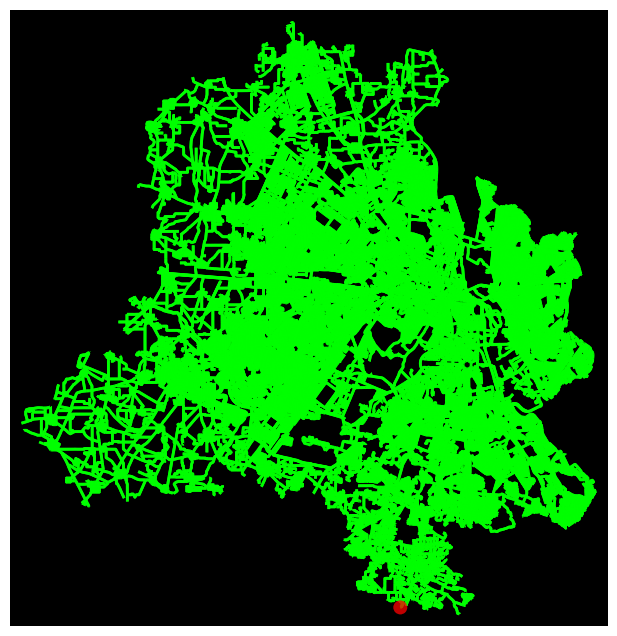

In [22]:
fig, ax = ox.plot_graph_route(G, optimal_route, node_size=0, edge_linewidth=2, edge_color='lime', bgcolor='k')


In [39]:
df = pd.read_excel("ev_final.xlsx")
df

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,15.00 kW,₹12.93 per unit,DC,1.0,DC-001,['4W']
2701,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CCS (DC),['4W']
2702,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CHAdeMO (DC),['4W']
2703,BSES-1,BSES-DEL,Verdemobility,Opposite Crime Police Office Sector-9 Rama Kri...,28.572632,77.169680,New Delhi,India,00:00:00,23:59:59,...,110022,south-west-delhi,NaN,2.0,7.4 kW,₹16 per unit,AC,2.0,TYPE - 2 (AC),['4W']


In [43]:
# Save the DataFrame to a CSV file
df.to_csv("processed_ev_data.csv", index=False)
